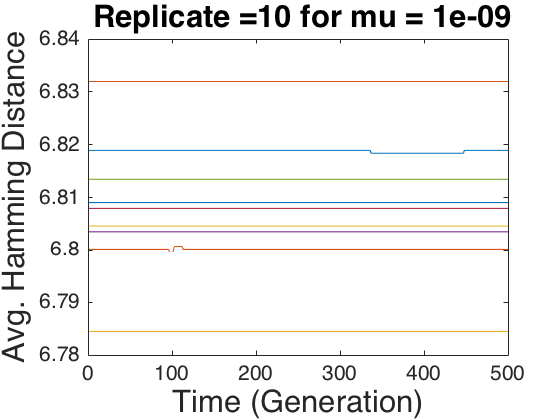

In [1]:
%General Parameters
N = 1000; %population size
num_loci = 1000;%number of loci in accessory genome
m = [100]; %m = [1, 10,50, 100, 1000, 10000];
mu_1 =  10^(-9);%mutation rate
rev_mut = .001;
num_essential = round(.25*num_loci);

%scalar values of some things
s_baggage = .01;%costs
s_gains = .1;%weights
frac_needed_scalar = .1; %fraction_needed
alpha= 1.96;
%vector values of the same things things
% weights = .1 * ones(1, num_loci);%vector of length "num_loci" denoting fitness contribution
%             %of each functional locus when needed
% costs = .001 * ones(1, num_loci);%vector denoting fitness cost of functional loci when not needed
% fraction_needed = .1 * ones(1, num_loci);%vector denoting fraction of environments each locus is needed


%simulation parameters
num_reps = 10; %number of replicate runs
time = 5*m;
%initialize data structures
avg_hamming_dist = nan(num_reps,time);
num_of_ones = nan(num_reps,time);
m_array_index = 0;





%for the figure
close all;
figure(1);
fontSize = 15;






change_rate = m;%number of gens btwn environmental changes


for j = 1:num_reps
    pop = [N,ones(1,num_loci),mu_1]; %starts all individuals with all functional loci
    rand_vect = rand(1,num_loci); %initializes with a random environment
    env = rand_vect<=frac_needed_scalar;
    k=1;
    counter = 0;
    avg_hamming_dist(j,1) = sum(pop(:,2:end-1) ~= repmat(env, [length(pop(:,1)) 1]),2);
    num_of_ones(j,1)= sum(pop(:,2:end-1),2);
    point_in_time = 0;
    
    while k == 1
        
        
        point_in_time = point_in_time + 1;
        %%%%% To Keep Environment Constant%%%%%%
        %if mod(counter,change_rate)==0 %determines if environment should change this generation
        %    rand_vect = rand(1,num_loci); %initializes with a random environment
        %    env = rand_vect<=frac_needed_scalar; %resets each environment
        %end
        
        pop = mutate3(pop, rev_mut, num_essential); %mutate population
        %%%%%%%%%%% deals with extinction %%%%%%%%%%%%%%%%%%%
        if (size(pop,1) == 1) && (isnan(pop(:,2)))
            break
        end
        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
        
        fitnesses = compute_fitness3(pop,s_gains,env,s_baggage); %computes fitnesses for each unique genotype
        
        pop = wright_fisher2(fitnesses); %performs wright_fisher sampling to update population to next generation
        avg_hamming_dist(j,point_in_time) = mean(sum(pop(:,2:end-1) ~= repmat(env, [length(pop(:,1)) 1]),2));
        num_of_ones(j,point_in_time)= mean(sum(pop(:,2:end-1),2));
        
        
        if point_in_time == time
            k = 0;
        end
        
        
        
    end
    
    
end
x2_1=1:length(avg_hamming_dist);
y2_1=avg_hamming_dist;
y3_1=log(avg_hamming_dist);
plot(x2_1,y3_1)
a = [' Replicate =', num2str(num_reps),' for mu = ', num2str(mu_1),'' ];
title(a, 'FontSize', fontSize);
ylabel('Avg. Hamming Distance', 'FontSize', fontSize);
xlabel('Time (Generation)', 'FontSize', fontSize);


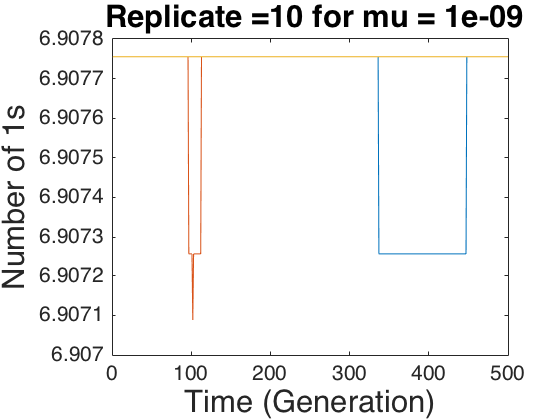

In [2]:
x2_2=1:length(num_of_ones);
y2_2=num_of_ones;
y3_2=log(num_of_ones);
plot(x2_2,y3_2)
a = [' Replicate =', num2str(num_reps),' for mu = ', num2str(mu_1),'' ];
title(a, 'FontSize', fontSize);
ylabel('Number of 1s', 'FontSize', fontSize);
xlabel('Time (Generation)', 'FontSize', fontSize);

In [3]:
save('Hamming Distance PolyFit mu= 10^(-9) constant Env.mat');

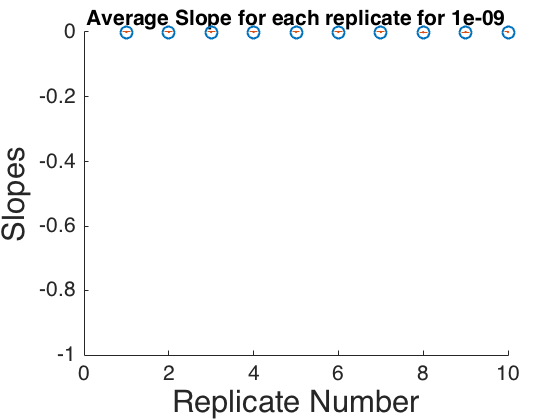

phat_slopes =

   1.0e-03 *

    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
   -0.7539
   -0.0323
    0.0000


ci_slopes =

   -0.0000    0.0000
   -0.0000    0.0000
   -0.0000    0.0000
   -0.0000    0.0000
   -0.0000    0.0000
   -0.0000    0.0000
   -0.0000    0.0000
   -0.0025    0.0009
   -0.0004    0.0003
   -0.0000    0.0000


average_Slope =

  -7.8620e-05


ci_avgs =

   1.0e-03 *

   -0.6282    0.4710

In [4]:
load('Hamming Distance PolyFit mu= 10^(-9) constant Env.mat');
for z = 1:num_reps
        eval(sprintf('x%dslopes = 1:(time);', z));
        eval(sprintf('y%dslopes =avg_hamming_dist(z,:);',z));
        eval(sprintf('p%dslopes = polyfit(x%dslopes,y%dslopes, 1);', z,z,z));
        eval(sprintf('q%dslopes = polyder(p%dslopes);', z,z));
        eval(sprintf('f%dslopes = polyval(p%dslopes,x%dslopes);', z,z,z));
        eval(sprintf('yfit%dslopes = p%dslopes(1) * x%dslopes + p%dslopes(2);', z,z,z,z));
        eval(sprintf('yresid%dslopes = y%dslopes - yfit%dslopes;', z,z,z));
        eval(sprintf('SSresid%dslopes = sum(yresid%dslopes.^2);', z,z));
        eval(sprintf('SStotal%dslopes = (length(y%dslopes)-1)* var(y%dslopes);', z,z,z));
        eval(sprintf('rsq%dslopes = 1 - SSresid%dslopes/SStotal%dslopes;', z,z,z));
end

slopes = zeros(num_reps,1);
rsq_matrixslopes = zeros(num_reps,1);

for z = 1:num_reps
    
    eval(sprintf('slopes(z,1) = q%dslopes;', z));  
    eval(sprintf('rsq_matrixslopes(z,1) = rsq%dslopes;', z));    
end


%slopes_r1 = sum(slopes(1,:),2)/(time/m);%slopes_r2 = sum(slopes(2,:),2)/(time/m);%slopes_r3 = sum(slopes(3,:),2)/(time/m);
%slopes_r4 = sum(slopes(4,:),2)/(time/m);%slopes_r5 = sum(slopes(5,:),2)/(time/m);%slopes_r6 = sum(slopes(6,:),2)/(time/m);
%slopes_r7 = sum(slopes(7,:),2)/(time/m);%slopes_r8 = sum(slopes(8,:),2)/(time/m);%slopes_r9 = sum(slopes(9,:),2)/(time/m);
%slopes_r10 = sum(slopes(10,:),2)/(time/m);

%%%%% For the Figure %%%%%%
phat_slopes =[slopes(1,1);slopes(2,1); slopes(3,1); slopes(4,1);slopes(5,1);
       slopes(6,1); slopes(7,1); slopes(8,1);slopes(9,1); slopes(10,1)]
se_slopes = sqrt((abs((1-phat_slopes).*(phat_slopes)))./N);
ci_plus_slopes = phat_slopes + alpha*se_slopes;
ci_minus_slopes = phat_slopes - alpha*se_slopes;
ci_slopes = [ci_minus_slopes, ci_plus_slopes]
ci_dist_slopes = (alpha*se_slopes);

%%%% For later use (Extracted in other script comparing mu and overspecialization rate/decayof1)%%%%%%%
average_Slope = mean(phat_slopes)
se_avgs = sqrt((abs((1-average_Slope).*(average_Slope)))./N);
ci_plus_avgs = average_Slope + alpha*se_avgs;
ci_minus_avgs = average_Slope - alpha*se_avgs;
ci_avgs = [ci_minus_avgs, ci_plus_avgs]

figure
hold on;
scatter([1:length(slopes(:,1))],phat_slopes)
errorbar([1:length(slopes(:,1))],phat_slopes, ci_dist_slopes,'.')
a = [ 'Average Slope for each replicate for ', num2str(mu_1),'' ];
title(a, 'FontSize', 10);
xlabel('Replicate Number', 'FontSize', fontSize);
ylabel('Slopes', 'FontSize', fontSize);
axis([0 10 -1 0]);

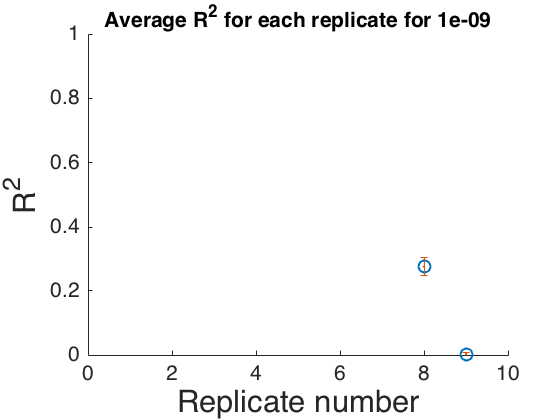

phat_rsqslopes =

      -Inf
      -Inf
      -Inf
      -Inf
      -Inf
      -Inf
      -Inf
    0.2742
    0.0029
      -Inf


ci_rsqslopes =

      -Inf       NaN
      -Inf       NaN
      -Inf       NaN
      -Inf       NaN
      -Inf       NaN
      -Inf       NaN
      -Inf       NaN
    0.2466    0.3019
   -0.0004    0.0062
      -Inf       NaN

In [5]:
phat_rsqslopes =[rsq1slopes;rsq2slopes; rsq3slopes; rsq4slopes;rsq5slopes;
       rsq6slopes; rsq7slopes; rsq8slopes;rsq9slopes; rsq10slopes]
se_rsqslopes = sqrt((abs((1-phat_rsqslopes).*(phat_rsqslopes)))./N);
ci_plus_rsqslopes = phat_rsqslopes + alpha*se_rsqslopes;
ci_minus_rsqslopes = phat_rsqslopes - alpha*se_rsqslopes;
ci_rsqslopes = [ci_minus_rsqslopes, ci_plus_rsqslopes]
ci_dist_rsqslopes = (alpha*se_rsqslopes);
figure
hold on;
scatter([1:length(rsq_matrixslopes(:,1))],phat_rsqslopes)
errorbar([1:length(rsq_matrixslopes(:,1))],phat_rsqslopes,ci_dist_rsqslopes,'.')
a = [ 'Average R^{2} for each replicate for ', num2str(mu_1),''];
title(a, 'FontSize', 10);
xlabel('Replicate number', 'FontSize', fontSize);
ylabel('R^{2}', 'FontSize', fontSize);
axis([0 10 0 1]);

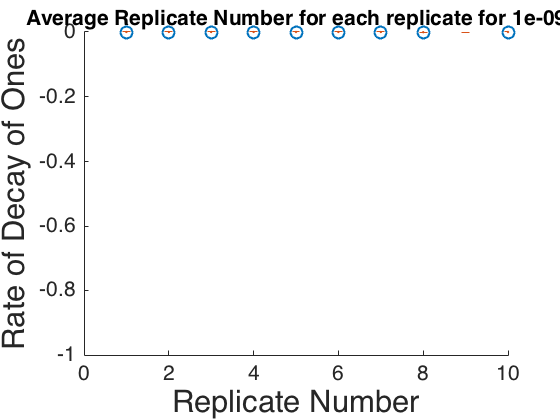

phat_ones =

   1.0e-03 *

    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
   -0.7539
    0.1145
    0.0000


ci_ones =

   -0.0000    0.0000
   -0.0000    0.0000
   -0.0000    0.0000
   -0.0000    0.0000
   -0.0000    0.0000
   -0.0000    0.0000
   -0.0000    0.0000
   -0.0025    0.0009
   -0.0005    0.0008
   -0.0000    0.0000


average_ones =

  -6.3941e-05


ci_avgones =

   1.0e-03 *

   -0.5596    0.4317

In [6]:
for z = 1:num_reps
        eval(sprintf('x%dones = 1:(time);', z));
        eval(sprintf('y%dones =num_of_ones(z,:);',z));
        eval(sprintf('p%dones = polyfit(x%dones,y%dones, 1);', z,z,z));
        eval(sprintf('q%dones = polyder(p%dones);', z,z));
        eval(sprintf('f%dones = polyval(p%dones,x%dones);', z,z,z));
        eval(sprintf('yfit%dones = p%dones(1) * x%dones + p%dones(2);', z,z,z,z));
        eval(sprintf('yresid%dones = y%dones - yfit%dones;', z,z,z));
        eval(sprintf('SSresid%dones = sum(yresid%dones.^2);', z,z));
        eval(sprintf('SStotal%dones = (length(y%dones)-1)* var(y%dones);', z,z,z));
        eval(sprintf('rsq%dones = 1 - SSresid%dones/SStotal%dones;', z,z,z));
end

rateofdecay = zeros(num_reps,1);
rsq_matrixones = zeros(num_reps,1);

for z = 1:num_reps
    
    eval(sprintf('rateofdecay(z,1) = q%dones;', z));  
    eval(sprintf('rsq_matrixones(z,1) = rsq%dones;', z));    
end



%%%%% For the Figure %%%%%%
phat_ones =[rateofdecay(1,1);rateofdecay(2,1); rateofdecay(3,1); rateofdecay(4,1);rateofdecay(5,1);
       rateofdecay(6,1); rateofdecay(7,1); rateofdecay(8,1);rateofdecay(9,1); rateofdecay(10,1)]
se_ones = sqrt((abs((1-phat_ones).*(phat_ones)))./N);
ci_plus_ones = phat_ones + alpha*se_ones;
ci_minus_ones = phat_ones - alpha*se_ones;
ci_ones = [ci_minus_ones, ci_plus_ones]
ci_dist_ones = (alpha*se_ones);

%%%% For later use (Extracted in other script comparing mu and overspecialization rate/decayof1)%%%%%%%
average_ones = mean(phat_ones)
se_avgones = sqrt((abs((1-average_ones).*(average_ones)))./N);
ci_plus_avgones = average_ones + alpha*se_avgones;
ci_minus_avgones = average_ones - alpha*se_avgones;
ci_avgones = [ci_minus_avgones, ci_plus_avgones]

figure
hold on;
scatter([1:length(rateofdecay(:,1))],phat_ones)
errorbar([1:length(rateofdecay(:,1))],phat_ones, ci_dist_ones,'.')
a = [ 'Average Replicate Number for each replicate for ', num2str(mu_1),'' ];
title(a, 'FontSize', 10);
xlabel('Replicate Number', 'FontSize', fontSize);
ylabel('Rate of Decay of Ones', 'FontSize', fontSize);
axis([0 10 -1 0]);

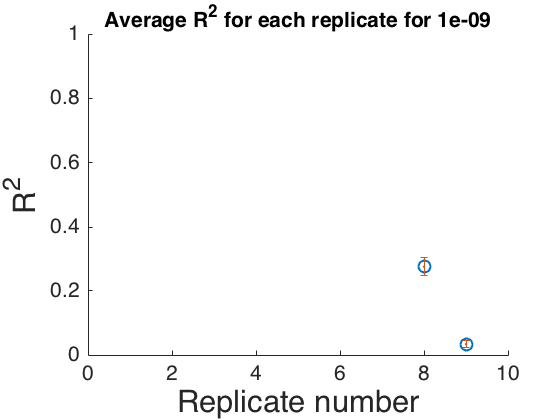

phat_rsqones =

      -Inf
      -Inf
      -Inf
      -Inf
      -Inf
      -Inf
      -Inf
    0.2742
    0.0336
      -Inf


ci_rsqones =

      -Inf       NaN
      -Inf       NaN
      -Inf       NaN
      -Inf       NaN
      -Inf       NaN
      -Inf       NaN
      -Inf       NaN
    0.2466    0.3019
    0.0225    0.0448
      -Inf       NaN

In [7]:
phat_rsqones =[rsq1ones;rsq2ones; rsq3ones; rsq4ones;rsq5ones;
       rsq6ones; rsq7ones; rsq8ones;rsq9ones; rsq10ones]
se_rsqones = sqrt((abs((1-phat_rsqones).*(phat_rsqones)))./N);
ci_plus_rsqones = phat_rsqones + alpha*se_rsqones;
ci_minus_rsqones = phat_rsqones - alpha*se_rsqones;
ci_rsqones = [ci_minus_rsqones, ci_plus_rsqones]
ci_dist_rsqones = (alpha*se_rsqones);
figure
hold on;
scatter([1:length(rsq_matrixones(:,1))],phat_rsqones)
errorbar([1:length(rsq_matrixones(:,1))],phat_rsqones,ci_dist_rsqones,'.')
a = [ 'Average R^{2} for each replicate for ', num2str(mu_1),''];
title(a, 'FontSize', 10);
xlabel('Replicate number', 'FontSize', fontSize);
ylabel('R^{2}', 'FontSize', fontSize);
axis([0 10 0 1]);

In [8]:
save('Hamming Distance PolyFit mu= 10^(-9) constant Env final.mat');